# ARIMA (to be finished...)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
train=pd.read_csv('train_time_stamped.csv')
train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010031018,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010031019,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010031020,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010031021,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010031022,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


## 1. Convert to Date_Time Format

In [3]:
type(train.loc[3, 'date_time'])

numpy.int64

In [4]:
train['date_time']=pd.to_datetime(train['date_time'], format='%Y%m%d%H')
train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [5]:
type(train.loc[3, 'date_time'])

pandas._libs.tslibs.timestamps.Timestamp

### Data Exploration

I will treat the data as a time series and I will not consider the features (I will perform "Multi Variate Time Series Forecasting" in the future)

In [6]:
train.columns

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')

In [7]:
train=train[['date_time', 'target_carbon_monoxide', 
                     'target_benzene', 'target_nitrogen_oxides']]

In [8]:
len(train)

7111

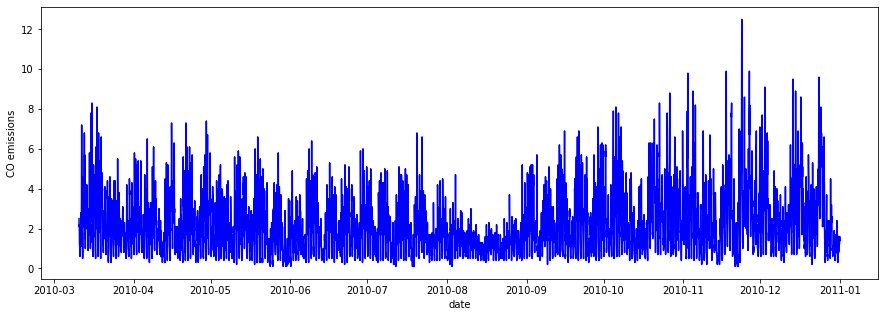

In [10]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(train.date_time, train.target_carbon_monoxide,  color='blue')
plt.xlabel("date")
plt.ylabel("CO emissions")
plt.show()

To better visualize the above plot, I will divide the series into four quarters

In [13]:
train_first=train[(train.index<1778)]

train_second=train[(train.index >1778)&(train.index<3556)]

train_third=train[(train.index >3556)&(train.index<5333)]

train_fourth=train[(train.index >5333)]

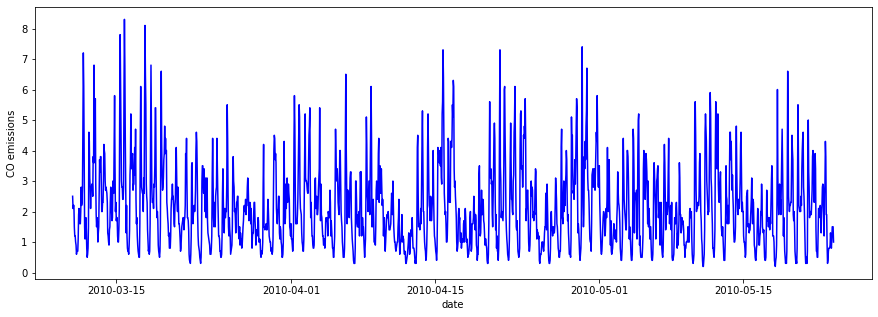

In [14]:
plt.plot(train_first.date_time, train_first.target_carbon_monoxide,  color='blue')
plt.xlabel("date")
plt.ylabel("CO emissions")
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

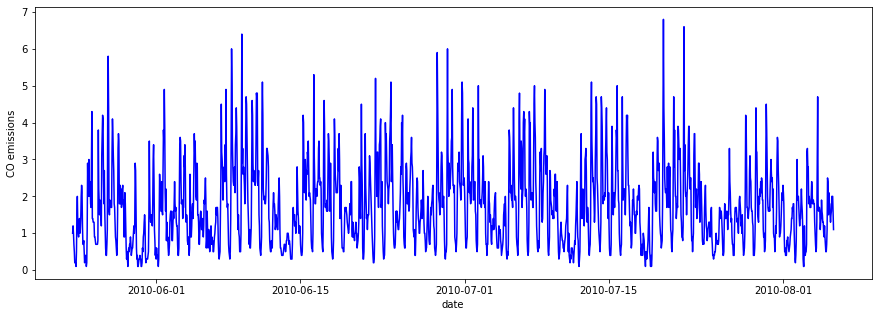

In [15]:
plt.plot(train_second.date_time, train_second.target_carbon_monoxide,  color='blue')
plt.xlabel("date")
plt.ylabel("CO emissions")
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

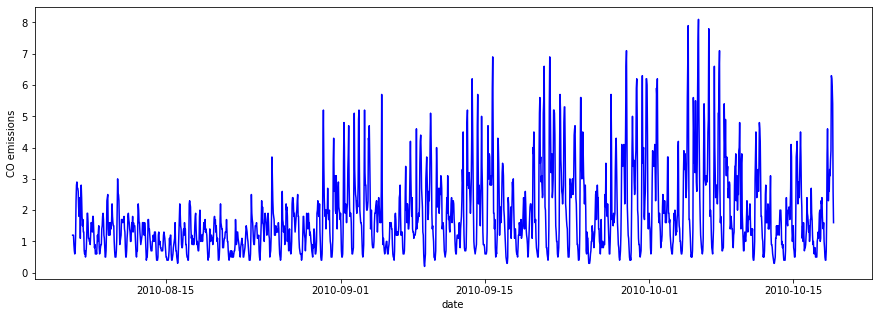

In [16]:
plt.plot(train_third.date_time, train_third.target_carbon_monoxide,  color='blue')
plt.xlabel("date")
plt.ylabel("CO emissions")
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

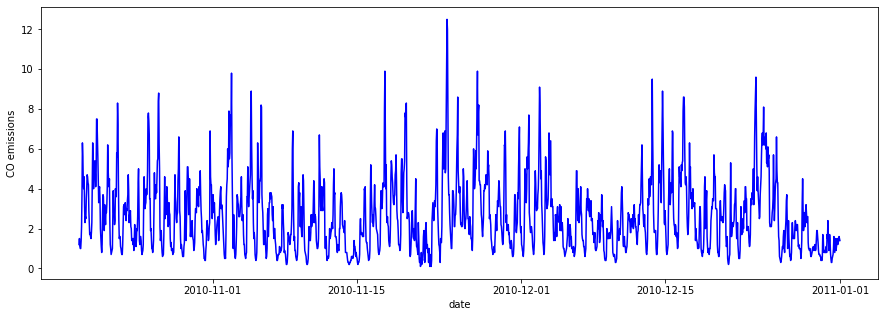

In [17]:
plt.plot(train_fourth.date_time, train_fourth.target_carbon_monoxide,  color='blue')
plt.xlabel("date")
plt.ylabel("CO emissions")
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

The plots above indicate that the first, second, and fourth quarters are stationary with approximately constant variance, while the the thirs quarter is stationary with non-constant variance.
I will check for stationarity in a quantitative way using the augmented dickey fuller test (ADH Test) and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test using the *statsmodels* package

In [18]:
from statsmodels.tsa.stattools import adfuller, kpss

In [19]:
#ADF Test
result= adfuller(train.target_carbon_monoxide.values, autolag='AIC')
print(f'ADF Statistics: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'{key},{value}') 

# first quaarted
result_first= adfuller(train_first.target_carbon_monoxide.values, autolag='AIC')
print(f'\n ADF Statistics: {result_first[0]}')
print(f'p-value: {result_first[1]}')
for key, value in result_first[4].items():
    print('Critical Values:')
    print(f'{key},{value}') 

# second quaarted
result_second= adfuller(train_second.target_carbon_monoxide.values, autolag='AIC')
print(f'\n ADF Statistics: {result_second[0]}')
print(f'p-value: {result_second[1]}')
for key, value in result_second[4].items():
    print('Critical Values:')
    print(f'{key},{value}') 

# first quaarted
result_third= adfuller(train_third.target_carbon_monoxide.values, autolag='AIC')
print(f'\n ADF Statistics: {result_third[0]}')
print(f'p-value: {result_third[1]}')
for key, value in result_third[4].items():
    print('Critical Values:')
    print(f'{key},{value}') 

# first quaarted
result_fourth= adfuller(train_fourth.target_carbon_monoxide.values, autolag='AIC')
print(f'\n ADF Statistics: {result_fourth[0]}')
print(f'p-value: {result_fourth[1]}')
for key, value in result_fourth[4].items():
    print('Critical Values:')
    print(f'{key},{value}') 

ADF Statistics: -8.982102584772043
p-value: 7.263413572494717e-15
Critical Values:
1%,-3.4312743568595447
Critical Values:
5%,-2.8619484921683713
Critical Values:
10%,-2.5669874363317224

 ADF Statistics: -4.085468864125489
p-value: 0.001023498002671154
Critical Values:
1%,-3.4340879605755426
Critical Values:
5%,-2.8631911014332876
Critical Values:
10%,-2.567648997323346

 ADF Statistics: -4.175123172706338
p-value: 0.000725784531253912
Critical Values:
1%,-3.434090098474972
Critical Values:
5%,-2.8631920451777195
Critical Values:
10%,-2.5676494998436072

 ADF Statistics: -3.127289216826475
p-value: 0.024598478538727826
Critical Values:
1%,-3.4340922388213175
Critical Values:
5%,-2.863192990001633
Critical Values:
10%,-2.5676500029387754

 ADF Statistics: -4.964319711881103
p-value: 2.609928203397835e-05
Critical Values:
1%,-3.434090098474972
Critical Values:
5%,-2.8631920451777195
Critical Values:
10%,-2.5676494998436072


In all cases, the ADF statistics values are negative. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

In all cases expept the four quarter (as expected from the line plots above), the ADF statistics values are less than the values at 1%, 5%, and 10%. Furthermore, the p-value is much smaller than the significance levels (0.01, 0.05, 0.10).

This suggests that (expect in the third quarted) we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

Although some parts of the dataset may be non stationary, I will consider the whole dataset stationary and proceed with the ARIMA modeling.

### p, d, and q values of the ARIMA

The *d* value is the order of differencing, i.e., how many times the series needs to be differences until it becomes stationary. Because the CO emisisons series is stationary, I set d=0.

# AR term (p)

The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

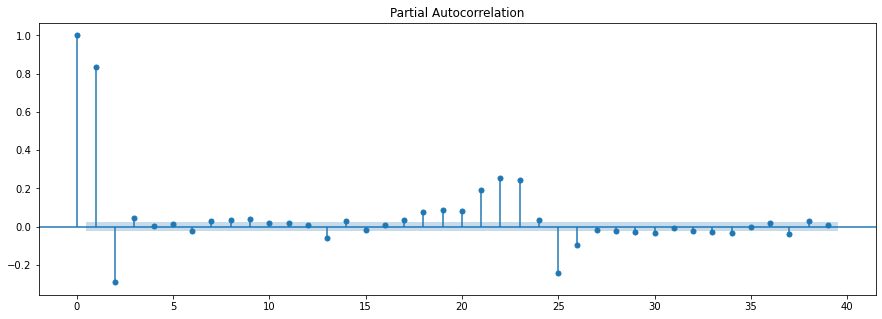

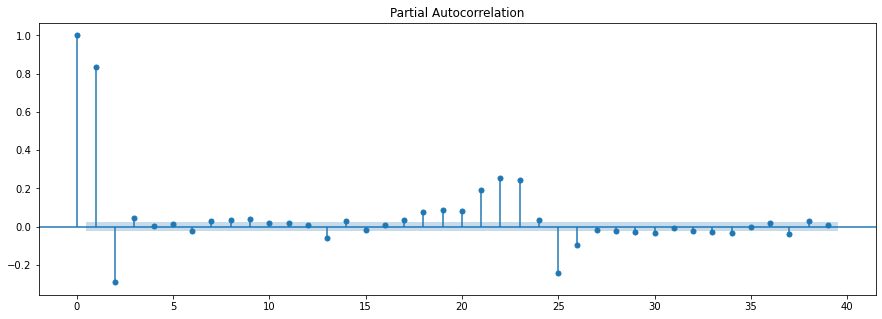

In [21]:
plot_pacf(train.target_carbon_monoxide)

Lag 0, 1, and 2 are significant (they cross the significance region); therefore, I will fix p to 2

## MA term (q)

Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

Let’s see the autocorrelation plot of the CO2 emission series.

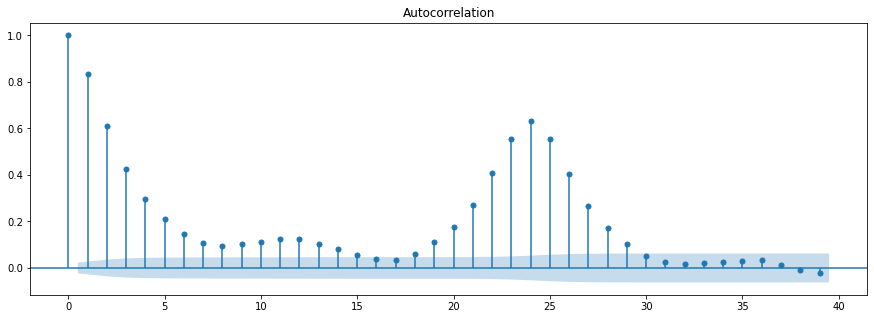

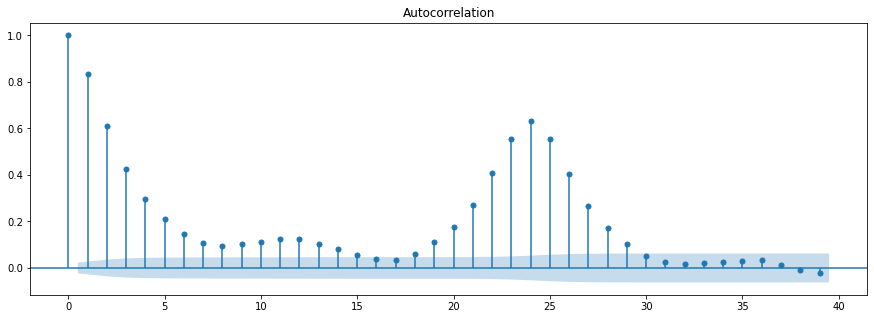

In [22]:
plot_acf(train.target_carbon_monoxide)

I will set q to 8

### Build the ARIMA model
I will use the ARIMA() implementation in statsmodels package, with d=0, p=2, and q=8.

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
# 0,2,8 ARIMA Model
model = ARIMA(train.target_carbon_monoxide, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                                ARMA Model Results                                
Dep. Variable:     target_carbon_monoxide   No. Observations:                 7111
Model:                         ARMA(2, 2)   Log Likelihood               -8147.830
Method:                           css-mle   S.D. of innovations              0.761
Date:                    Mon, 12 Jul 2021   AIC                          16307.659
Time:                            16:35:59   BIC                          16348.876
Sample:                                 0   HQIC                         16321.851
                                                                                  
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            2.0862      0.044     47.281      0.000       2.000       2.173
ar.L1.target_carbon_monoxide     0.8928      

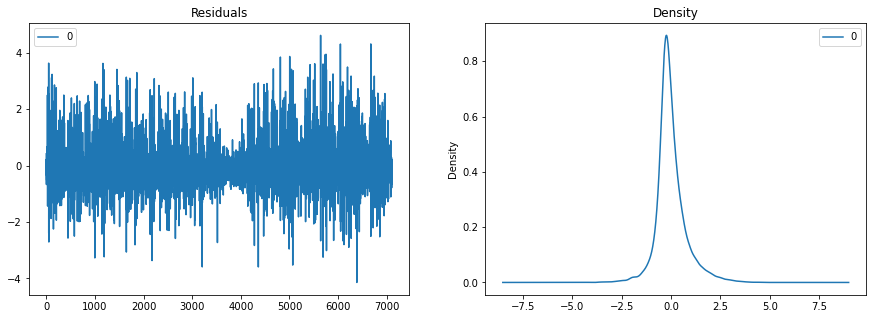

In [35]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

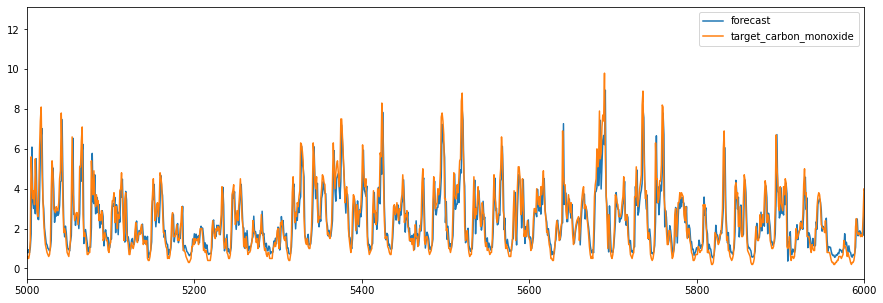

In [38]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.xlim(5000,6000)
plt.show()

## Out-of-Time Cross validation

In [87]:
# Create Training and Test
train_set = train.target_carbon_monoxide[:6043]
test_set = train.target_carbon_monoxide[6043:]

In [88]:
type(train_set)

pandas.core.series.Series

In [54]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train_set, order=(2,0,2))  
fitted = model.fit(disp=-1)  

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


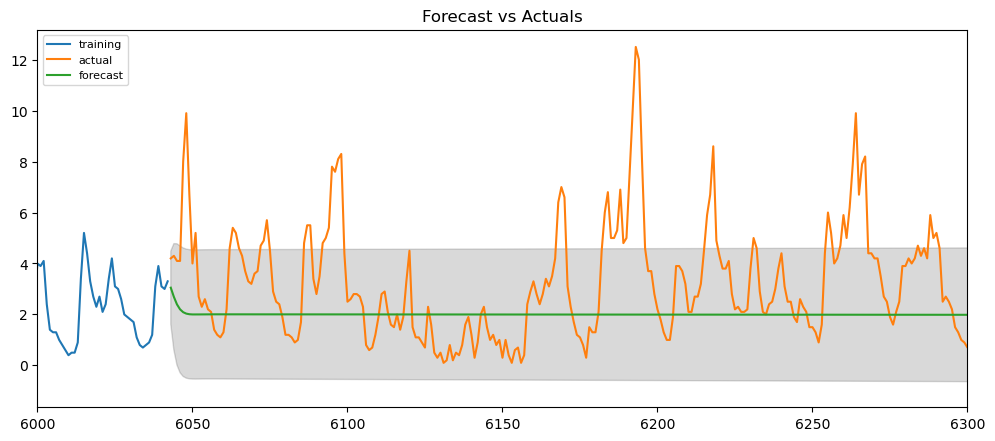

In [65]:
# Forecast
fc, se, conf = fitted.forecast(1068, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_set.index)
lower_series = pd.Series(conf[:, 0], index=test_set.index)
upper_series = pd.Series(conf[:, 1], index=test_set.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_set, label='training')
plt.plot(test_set, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xlim(6000,6300)
plt.show()

In [78]:
fc

array([3.05010248, 2.68928179, 2.39410027, ..., 1.92312482, 1.92304705,
       1.92296928])

In [79]:
se

array([0.73240973, 1.06641947, 1.21468708, ..., 1.47594911, 1.47611067,
       1.47627222])

In [80]:
conf

array([[ 1.6146058 ,  4.48559917],
       [ 0.59913804,  4.77942555],
       [ 0.01335734,  4.7748432 ],
       ...,
       [-0.96968228,  4.81593192],
       [-0.9700767 ,  4.8161708 ],
       [-0.9704711 ,  4.81640966]])

In [89]:
train_CO=train['target_carbon_monoxide']
train_BE=train['target_benzene']
train_NO=train['target_nitrogen_oxides']

In [90]:
type(train_CO)

pandas.core.series.Series

In [83]:
test=pd.read_csv('test.csv')
len(test)

2247

In [91]:
# Build Model
model_CO = ARIMA(train_CO, order=(2, 1, 2))  
fitted_CO = model_CO.fit(disp=-1)  

# Forecast
pred_CO = fitted_CO.forecast(2247, alpha=0.05)  # 95% conf


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [94]:
pred_CO

(array([1.47114588, 1.57732773, 1.66458977, ..., 1.60847374, 1.60838036,
        1.60828698]),
 array([0.7570747 , 1.11472956, 1.28064   , ..., 2.02001115, 2.02024551,
        2.02047985]),
 array([[-0.01269327,  2.95498502],
        [-0.60750205,  3.76215752],
        [-0.8454185 ,  4.17459804],
        ...,
        [-2.35067536,  5.56762284],
        [-2.35122808,  5.56798881],
        [-2.35178075,  5.56835472]]))